In [1]:
import os
os.getcwd()

'c:\\student_dropout_prediction_app\\Notebooks'

In [2]:
os.chdir('/student_dropout_prediction_app')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [4]:

df= pd.read_csv("cleaned_feature_eng_data.csv")
df.head()

,Marital Status,Application Mode,Application Order,Course Name,Daytime/Evening Attendance,Previous Qualification,Nationality,Mother's Qualification,Father's Qualification,Mother's Occupation,Father's Occupation,Displaced Student,Special Educational Needs,Is Debtor,Tuition Fees Up-to-Date,"Gender (1=Male, 0=Female)",Scholarship Holder,Age at Enrollment,International Student,Credited Units (1st Sem),Enrolled Units (1st Sem),Evaluated Units (1st Sem),Approved Units (1st Sem),Average Grade (1st Sem),Not Evaluated Units (1st Sem),Credited Units (2nd Sem),Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD),Student Status,FatherQual,PrevQual,MotherQual,Course_Field,MotherOcc_Simple,FatherOcc_Simple,ApplicationMode_Simple,ApplicationOrder_Simple,MaritalStatus_Simple,Nationality_Simple,Pass Rate (1st Sem),Pass Rate (2nd Sem),Total Approved Units,Total Enrolled Units,Total Evaluated Units,Grade Difference,Load Category,Debt Risk,Tuition Stable,Socioeconomic Stress Score,Financial Hardship,Econ_Disadvantage
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,General commerce course,Other—11th Year,Service/Sales/Security,Unskilled Workers,Yes,0,0,1,Male,0,20,No,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,Secondary_Incomplete,Secondary/Technical,Secondary/Technical,Arts,LowSkill,LowSkill,General,5,Single,Portuguese,0.000000,0.000000,0,0,0,0.000000,Low Load,0,0,12.2,0.804598,0
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,Secondary Education,Higher Education Degree,Technicians & Professionals,Technicians & Professionals,Yes,0,0,0,Male,0,19,No,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,HigherEd,Secondary/Technical,Secondary/Technical,Management,Technical,Technical,International,1,Single,Portuguese,1.000000,1.000000,12,12,12,-0.333333,Low Load,0,0,13.6,-0.379747,1
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 1st Cycle,Unskilled Workers,Unskilled Workers,Yes,0,0,0,Male,0,19,No,0,6,6,0,0.000000,0,0,6,6,0,0.000000,0,10.8,1.4,1.74,Dropout,Basic,Secondary/Technical,Secondary/Technical,Communication,LowSkill,LowSkill,General,5,Single,Portuguese,0.000000,0.000000,0,12,12,0.000000,Low Load,0,0,12.2,0.804598,1
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,Accounting & Admin course,Basic Edu 1st Cycle,Service/Sales/Security,Technicians & Professionals,Yes,0,0,1,Female,0,20,No,0,6,6,6,13.428571,0,0,6,6,5,12.400000,0,9.4,-0.8,-3.12,Graduate,Basic,Secondary/Technical,Secondary/Technical,Communication,LowSkill,Technical,General,2,Single,Portuguese,1.000000,0.833333,11,12,12,-1.028571,Low Load,0,0,8.6,0.256410,0
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 2nd Cycle,Unskilled Workers,Unskilled Workers,No,0,0,1,Female,0,34,No,0,6,6,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,Basic,Secondary/Technical,Secondary/Technical,Social,LowSkill,LowSkill,Unknown,1,Married,Portuguese,0.833333,1.000000,11,12,12,0.666667,Low Load,0,0,13.6,-0.379747,0


In [5]:
Categorical = ['MaritalStatus_Simple' , 'Daytime/Evening Attendance' , 'Displaced Student' , 'Gender (1=Male, 0=Female)' , 'International Student']
finance = ['Special Educational Needs' , 'Is Debtor' 
               , 'Tuition Fees Up-to-Date' , 'Scholarship Holder' , 'Econ_Disadvantage']
qual_occu = ['FatherQual' , 'PrevQual' , 'MotherQual' , 'MotherOcc_Simple' , 'FatherOcc_Simple']
appli = ['ApplicationMode_Simple' , 'Course_Field' , 'Nationality_Simple']

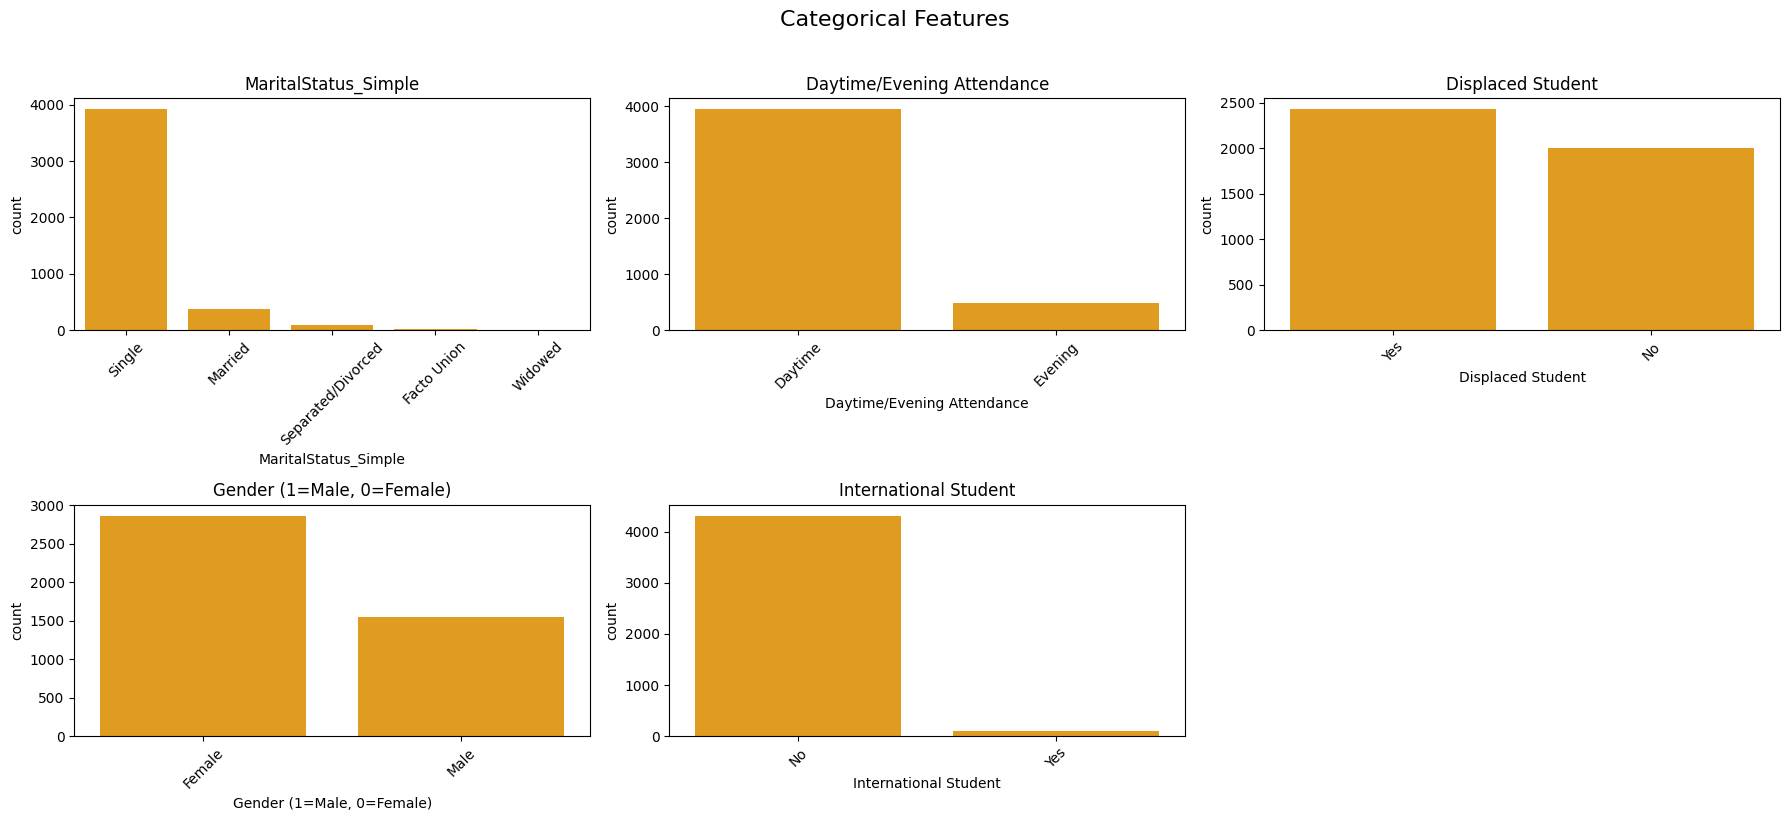

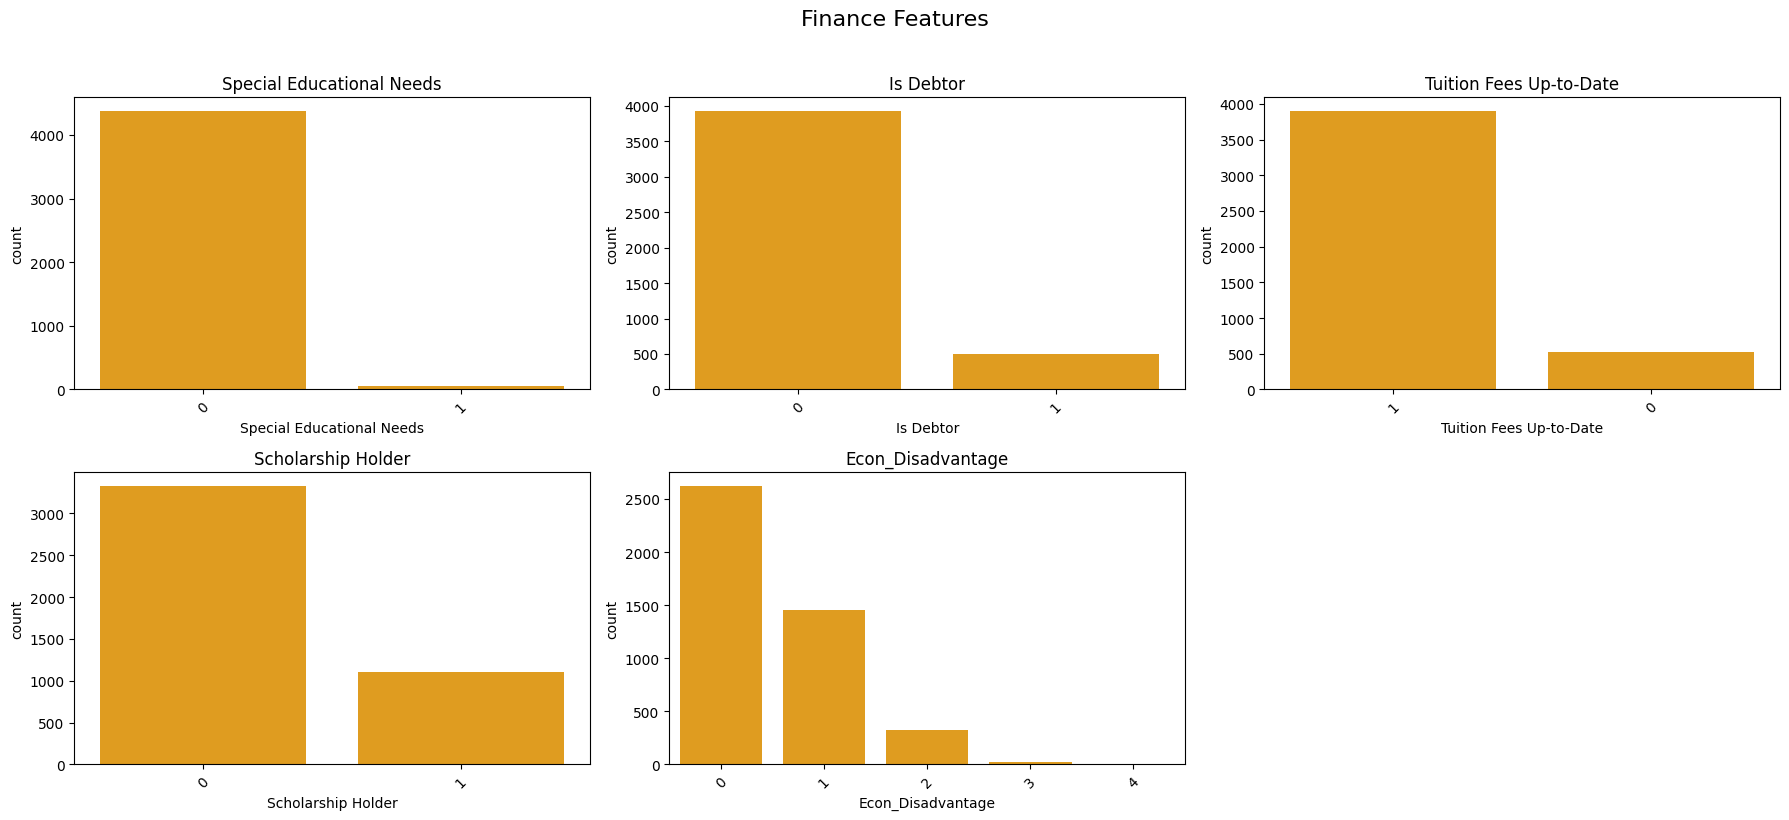

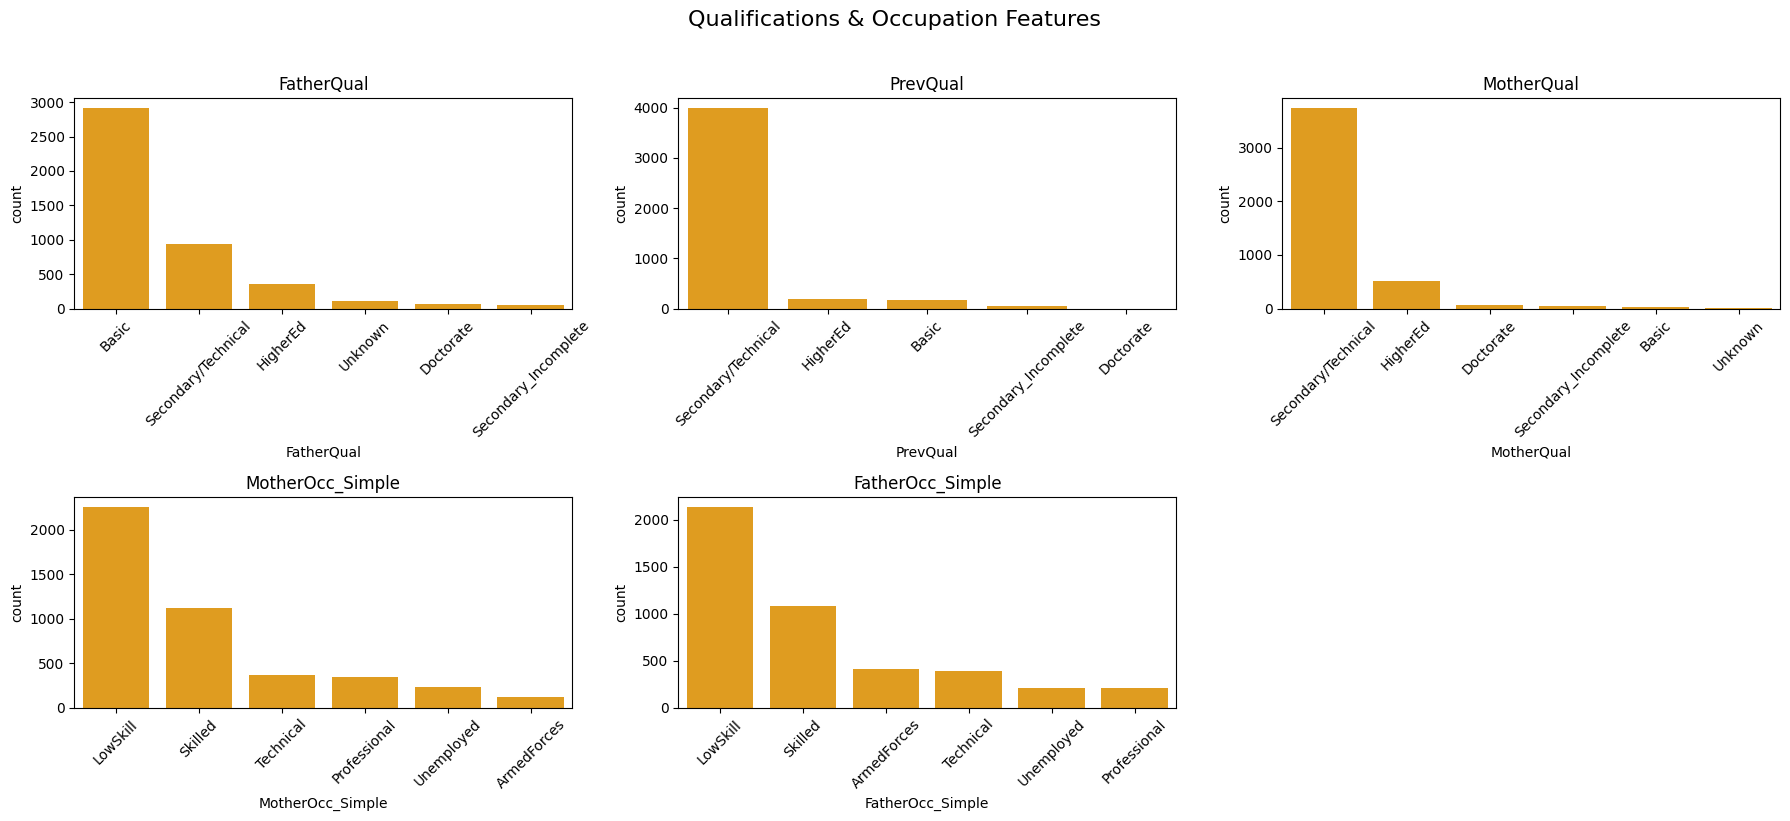

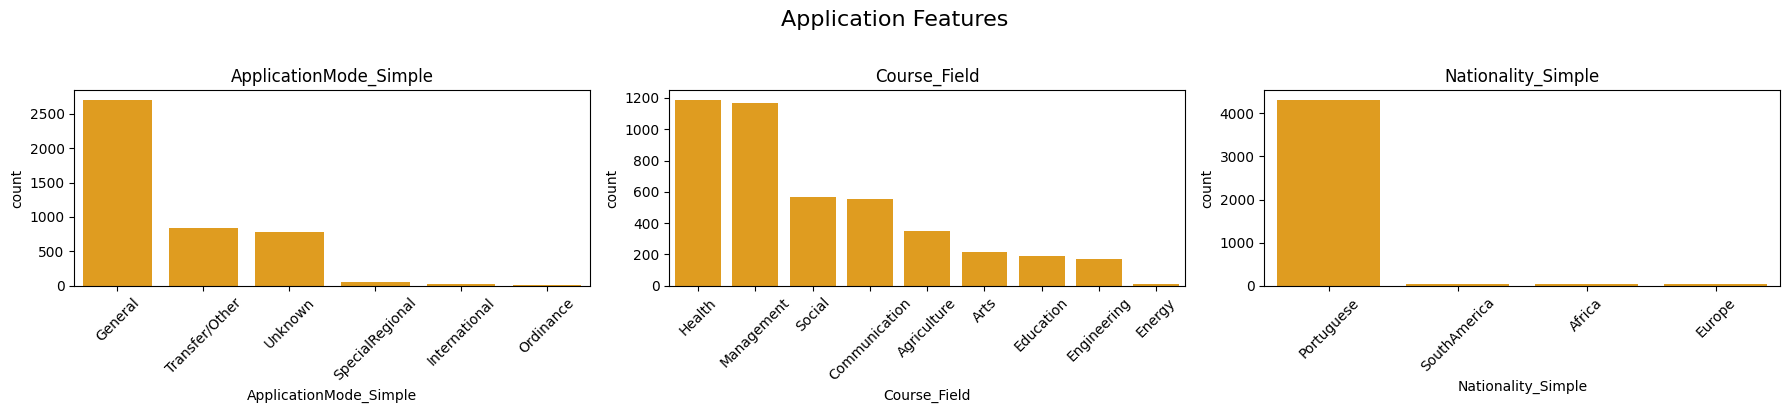

In [6]:

groups = {
    'Categorical': Categorical,
    'Finance': finance,
    'Qualifications & Occupation': qual_occu,
    'Application': appli
}

for group_name, cols in groups.items():
    print()
    print()
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(cols) / n_cols)  # calculate rows needed
    
    plt.figure(figsize=(n_cols*6, n_rows*4))
    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i+1)
        sns.countplot(data=df, x=col, order=df[col].value_counts().index , color ="orange")
        plt.title(f'{col}')
        plt.xticks(rotation=45)
    
    plt.suptitle(f'{group_name} Features', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

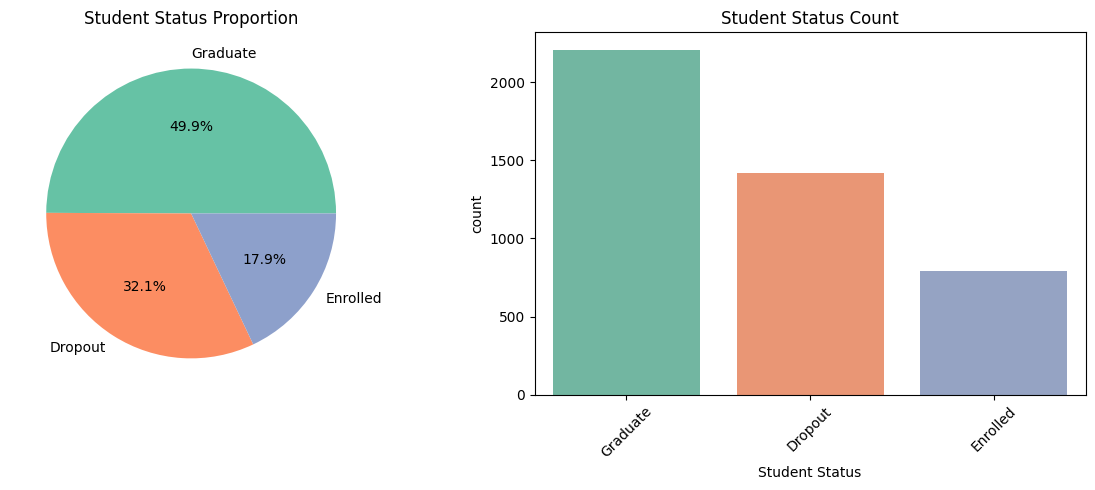

In [7]:

status_order = df['Student Status'].value_counts().index

# Color palette
palette = sns.color_palette("Set2", n_colors=len(status_order))
color_map = dict(zip(status_order, palette))

vc = df['Student Status'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pie(
    vc.values,
    labels=vc.index,
    autopct='%1.1f%%',
    colors=[color_map[v] for v in vc.index]
)
axes[0].set_title("Student Status Proportion")

sns.countplot(
    data=df,
    x='Student Status',
    order=status_order,
    palette=color_map,
    ax=axes[1]
)
axes[1].set_title("Student Status Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

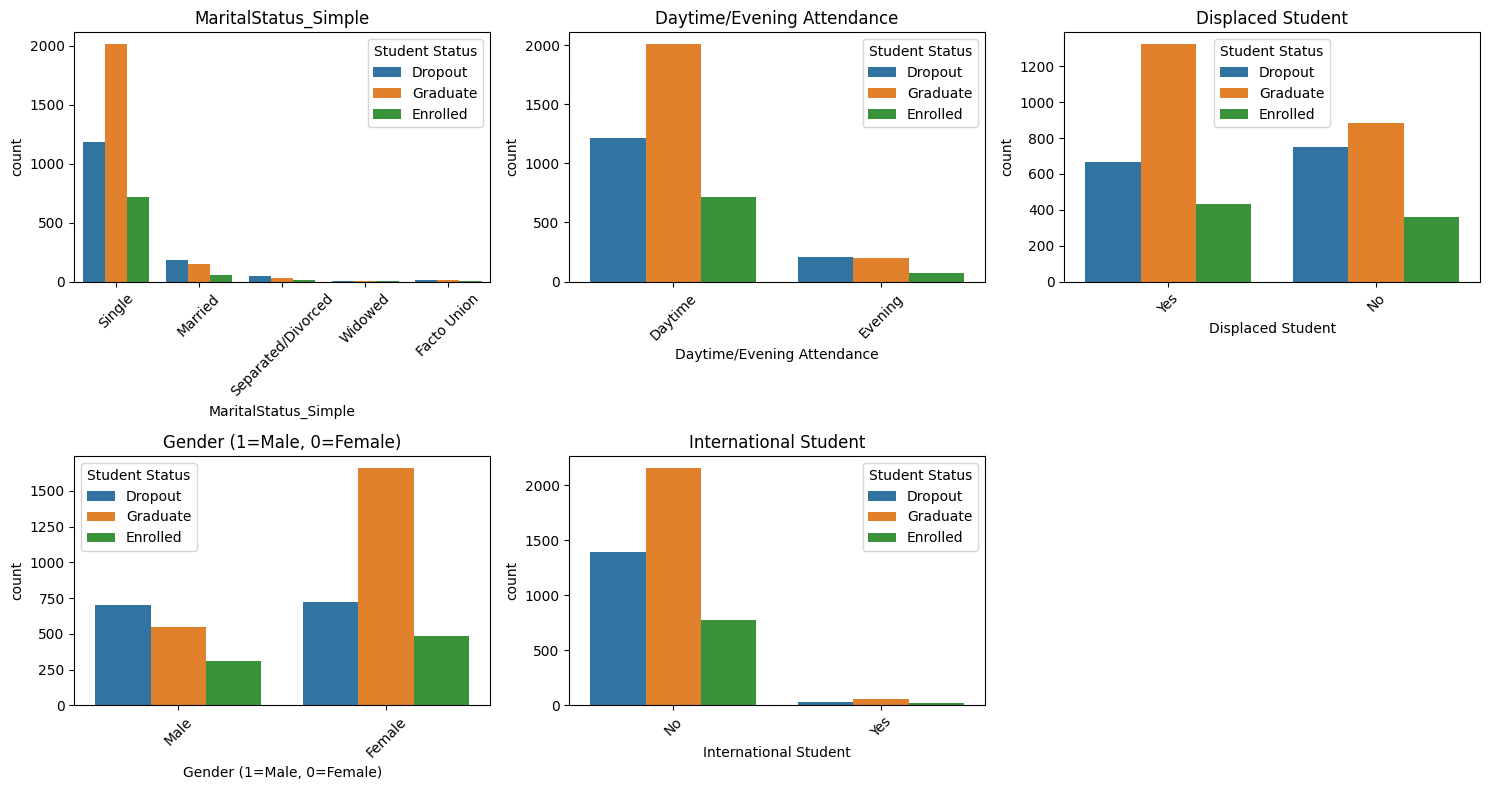

In [8]:

n = len(Categorical)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(Categorical, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='Student Status')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

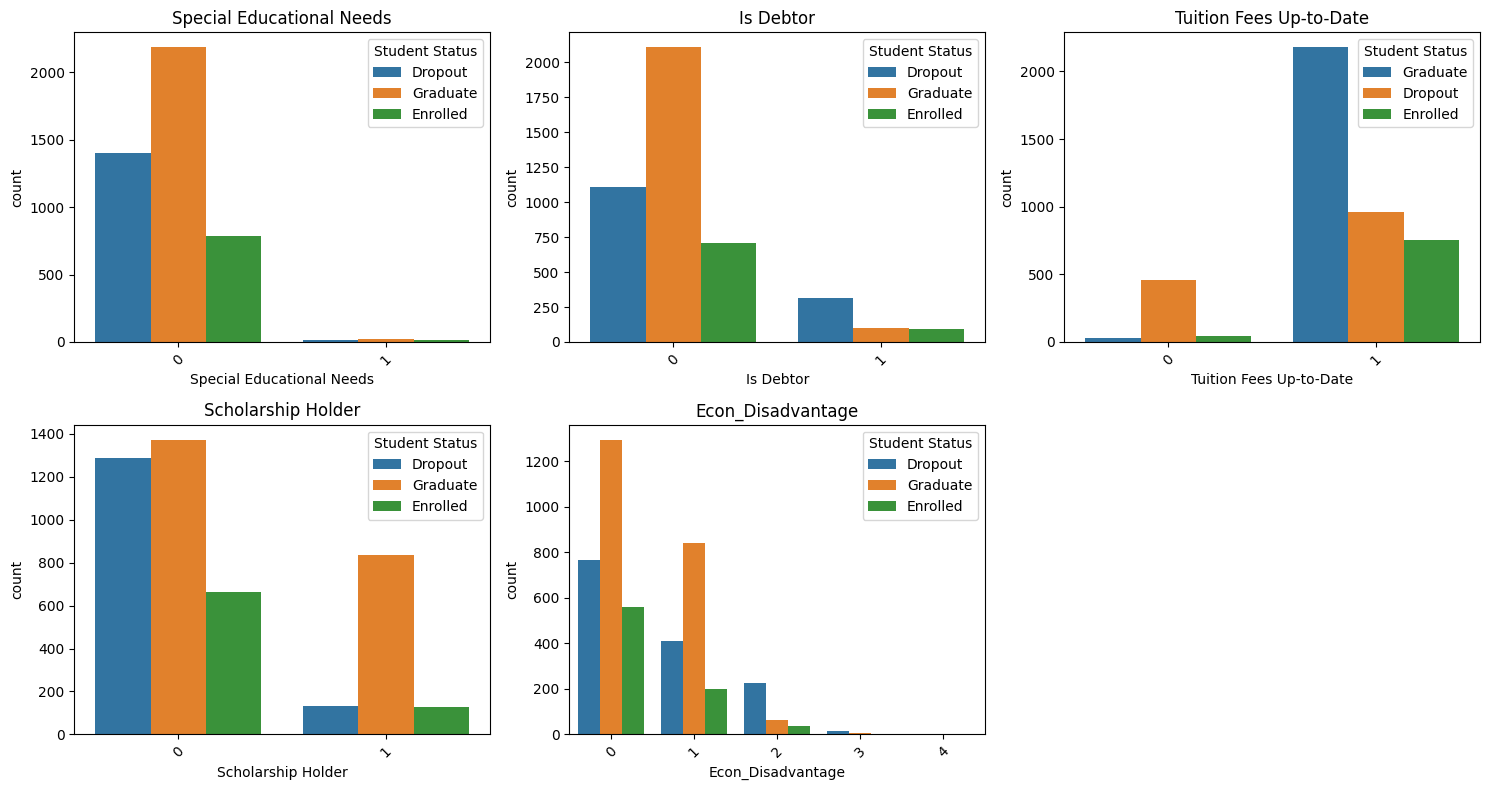

In [9]:
n = len(finance)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(finance, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='Student Status')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

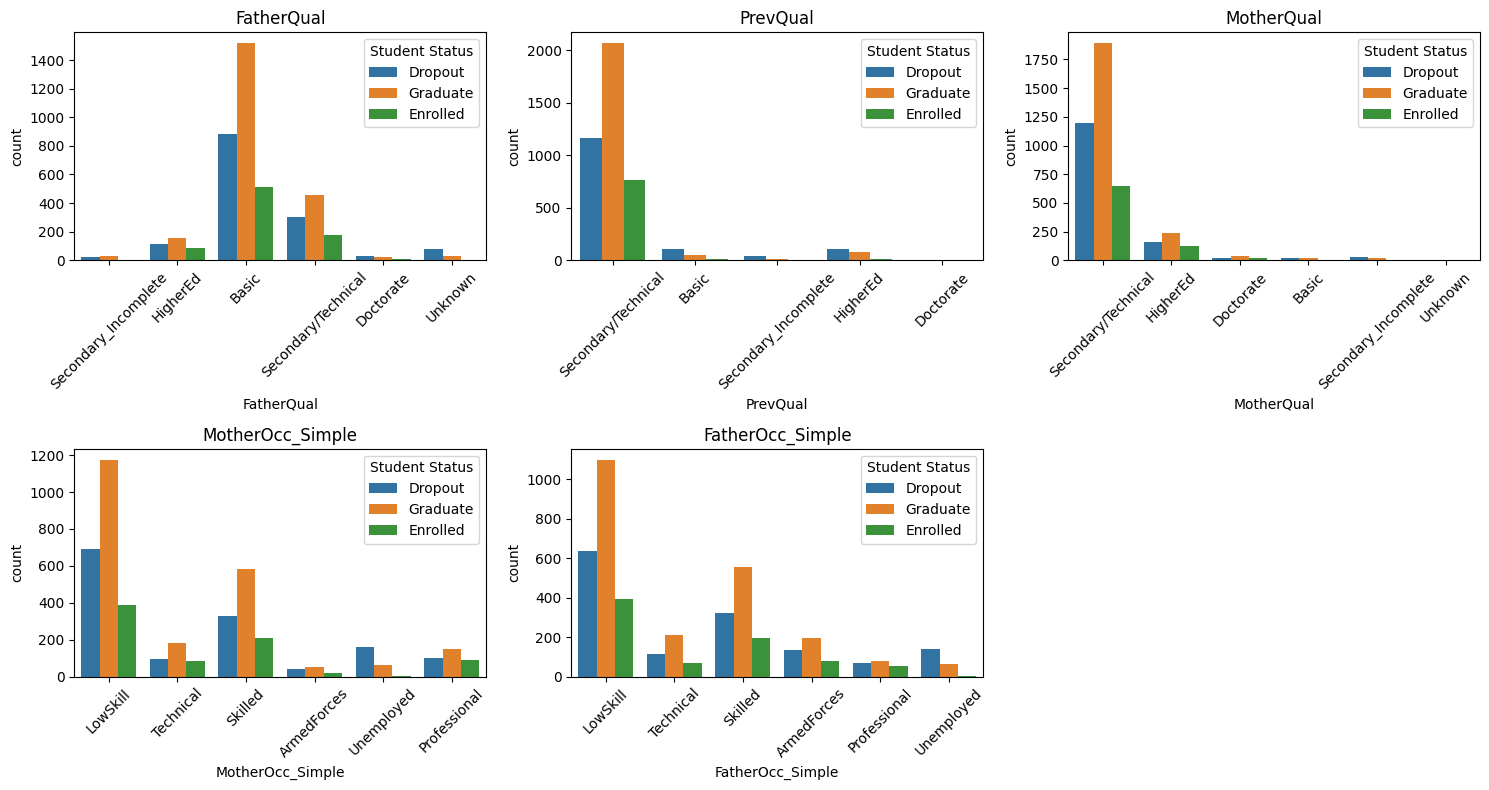

In [10]:
n = len(qual_occu)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(qual_occu, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='Student Status')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

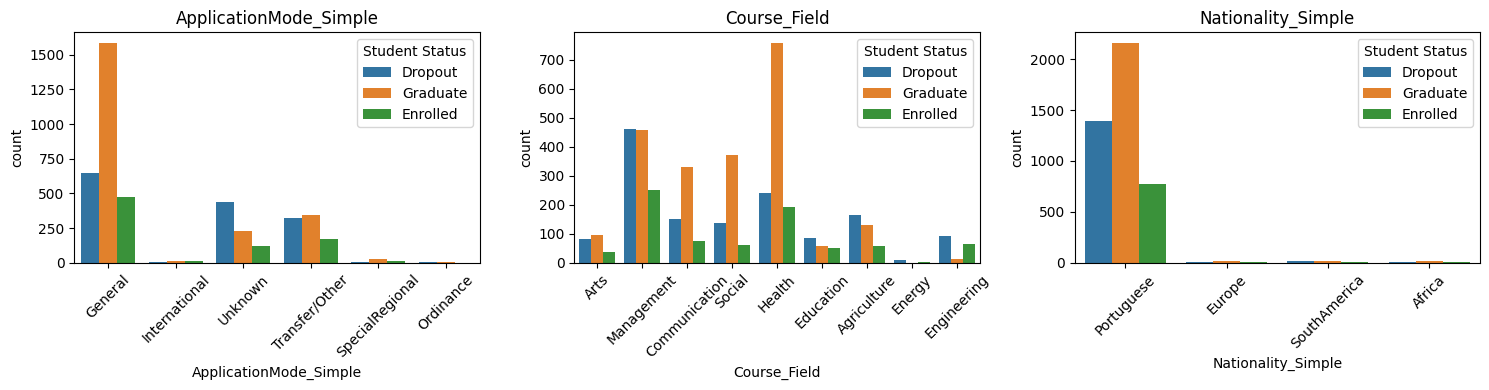

In [11]:
n = len(appli)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(appli, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='Student Status')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

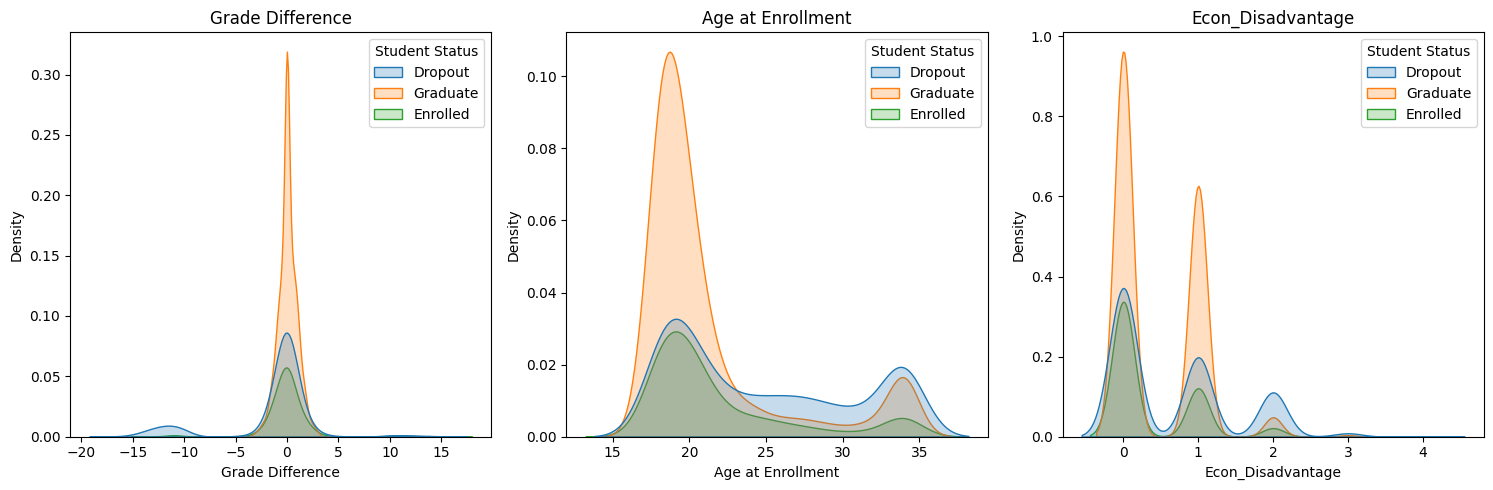

In [12]:
kde_features = [
    'Grade Difference',
    'Age at Enrollment',
    'Econ_Disadvantage',
]
plt.figure(figsize=(20, 5))

for i, col in enumerate(kde_features, 1):
    plt.subplot(1, 4, i)
    sns.kdeplot(data=df, x=col, hue='Student Status', fill=True)
    plt.title(f'{col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

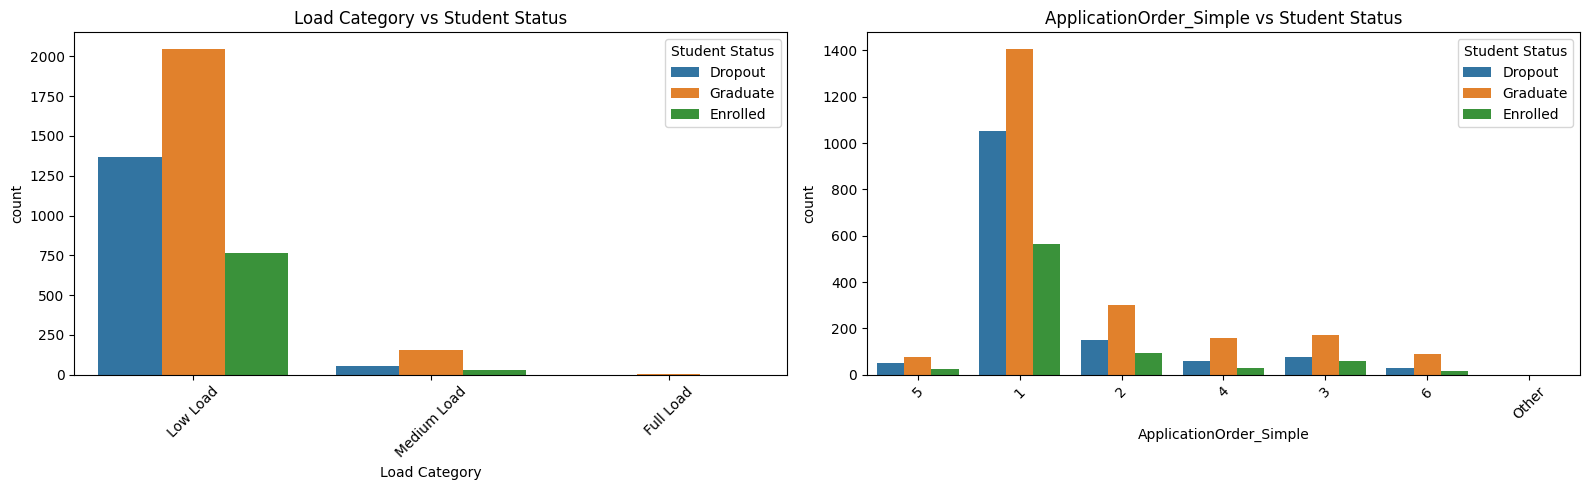

In [13]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Load Category', hue='Student Status')
plt.xticks(rotation=45)
plt.title('Load Category vs Student Status')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='ApplicationOrder_Simple', hue='Student Status')
plt.xticks(rotation=45)
plt.title('ApplicationOrder_Simple vs Student Status')

plt.tight_layout()
plt.show()

In [14]:
cols_1sem = [
    'Credited Units (1st Sem)','Enrolled Units (1st Sem)','Evaluated Units (1st Sem)',
    'Approved Units (1st Sem)','Average Grade (1st Sem)','Not Evaluated Units (1st Sem)']
cols_2sem= ['Credited Units (2nd Sem)','Enrolled Units (2nd Sem)','Evaluated Units (2nd Sem)',
    'Approved Units (2nd Sem)','Average Grade (2nd Sem)','Not Evaluated Units (2nd Sem)'
]

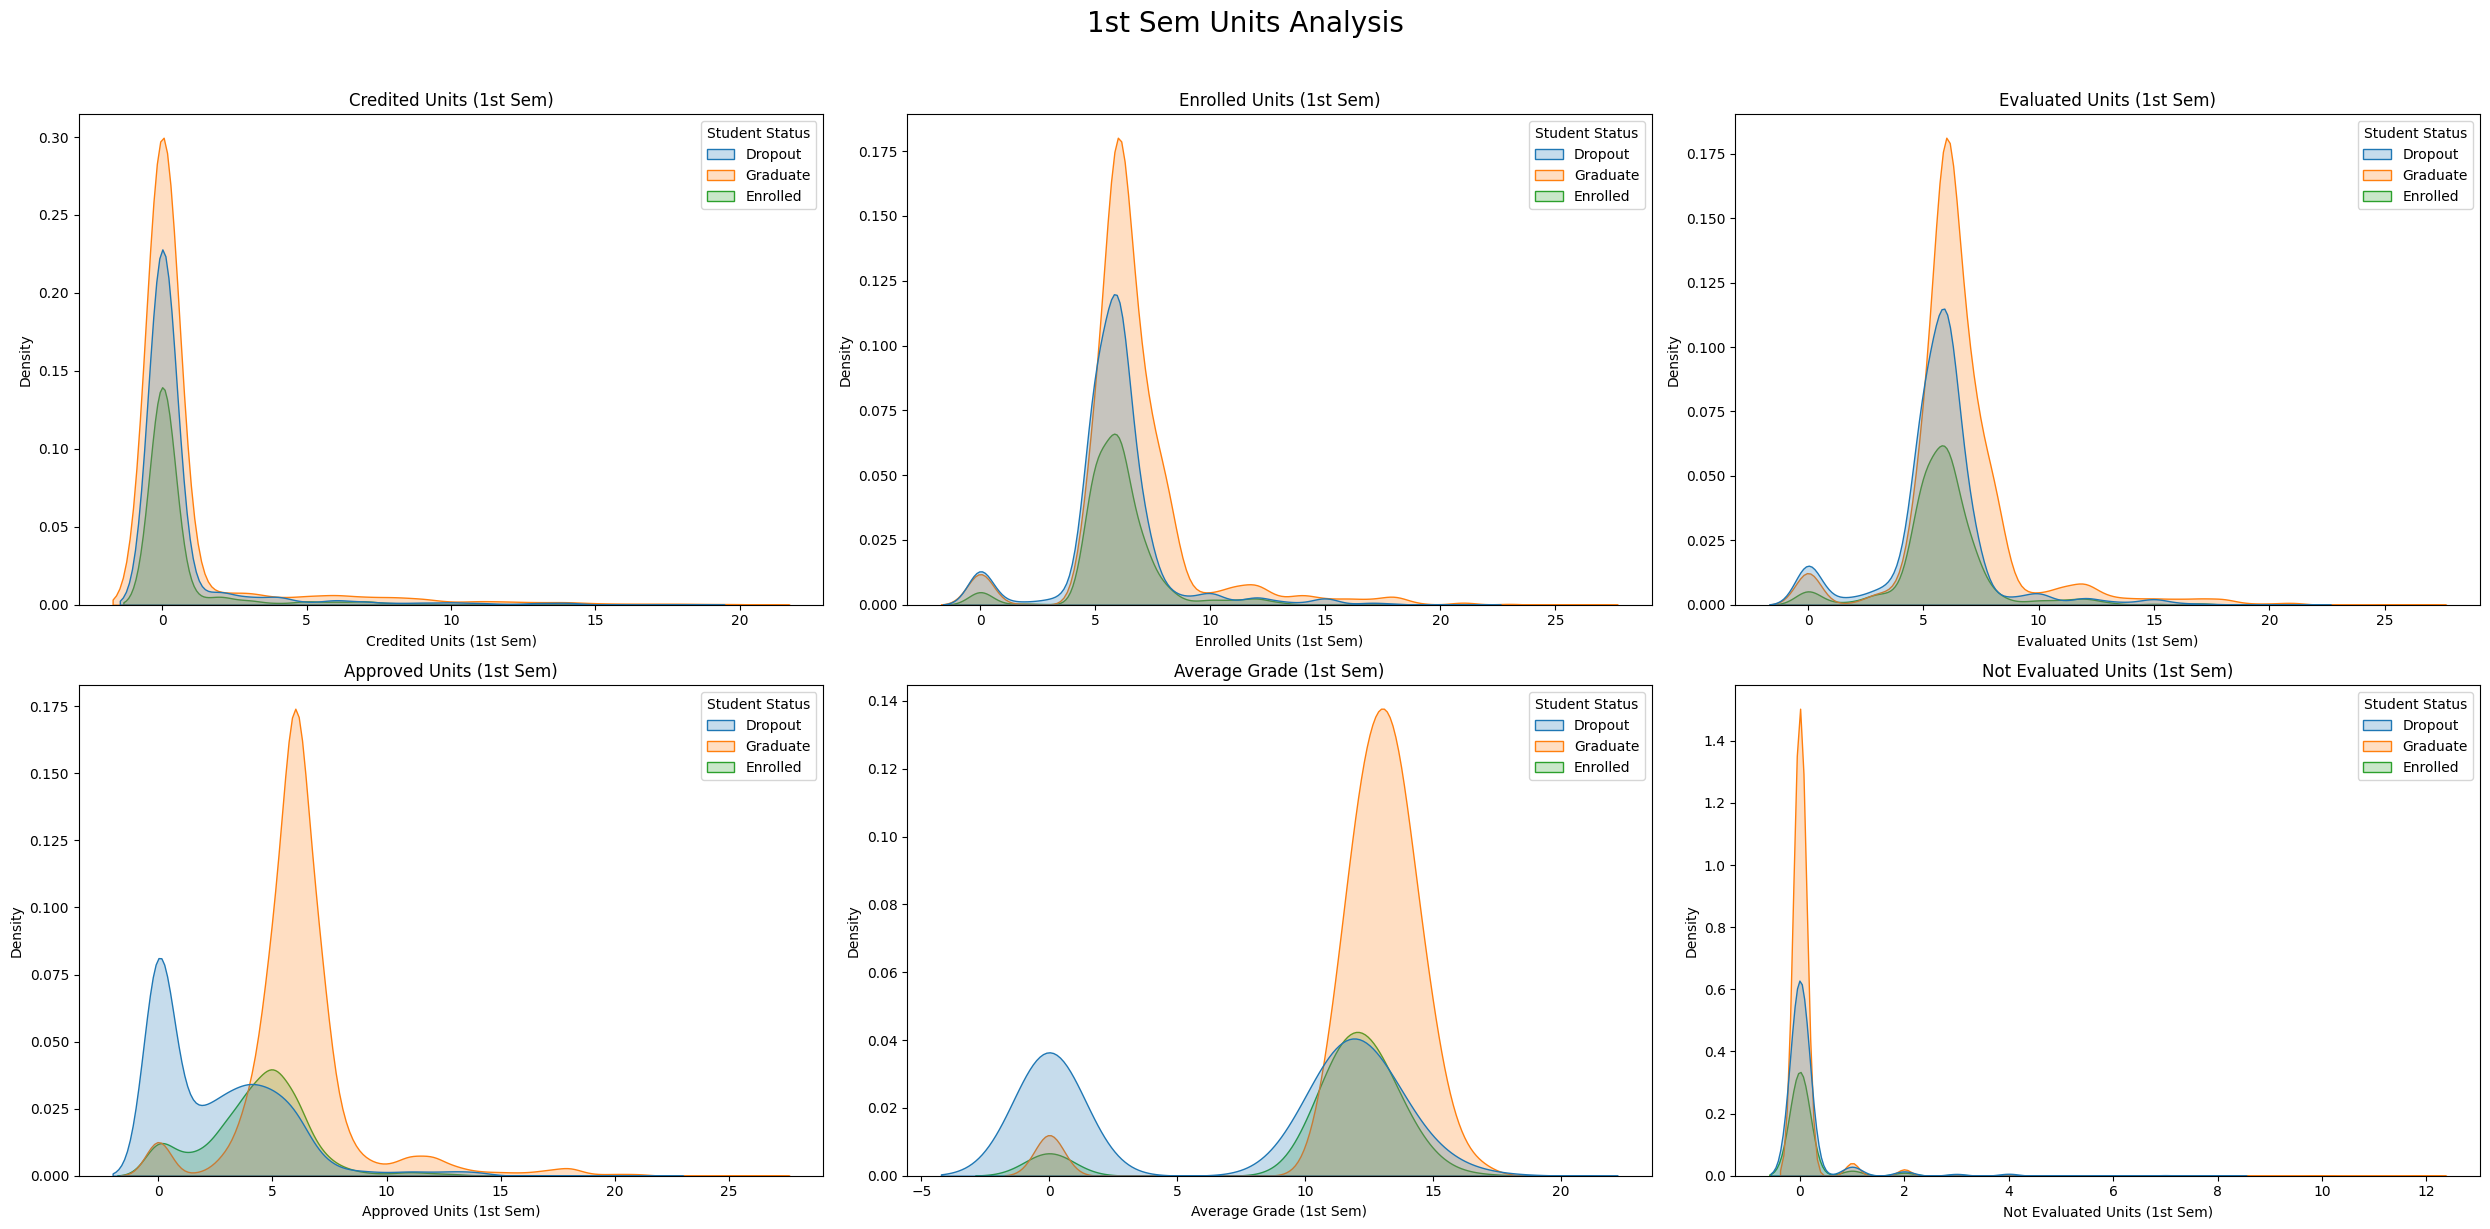

In [15]:
plt.figure(figsize=(25, 12))
plt.suptitle("1st Sem Units Analysis", fontsize=20, y=1.02)

for i, col in enumerate(cols_1sem, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df, x=col, hue='Student Status', fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

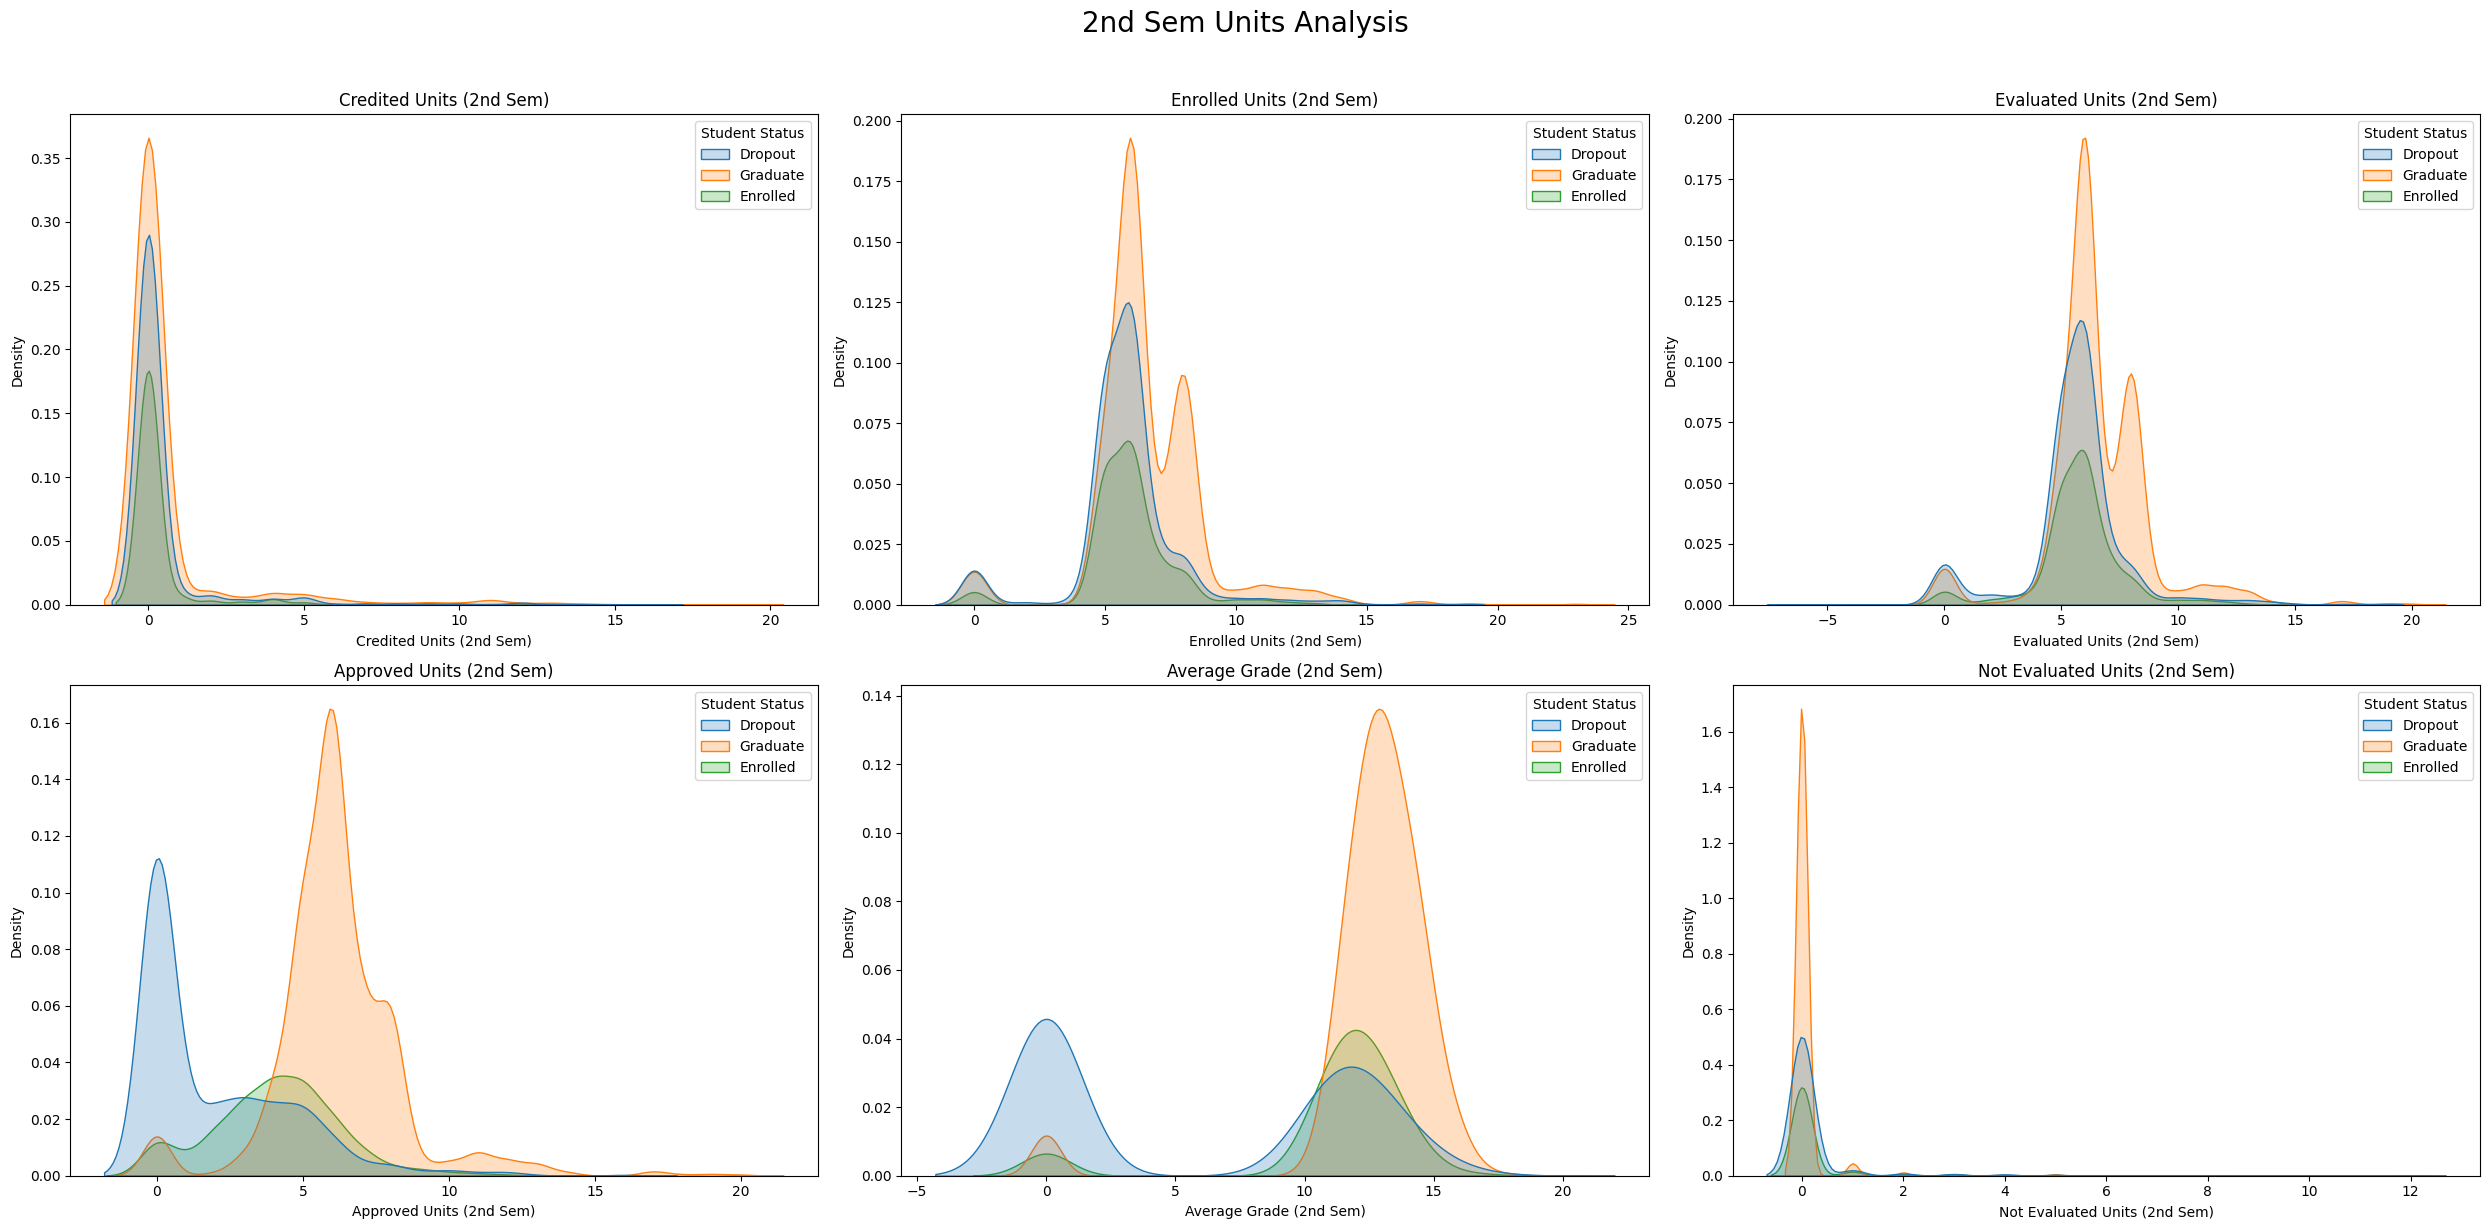

In [16]:

plt.figure(figsize=(25, 12))
plt.suptitle("2nd Sem Units Analysis", fontsize=20, y=1.02)

for i, col in enumerate(cols_2sem, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df, x=col, hue='Student Status', fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()

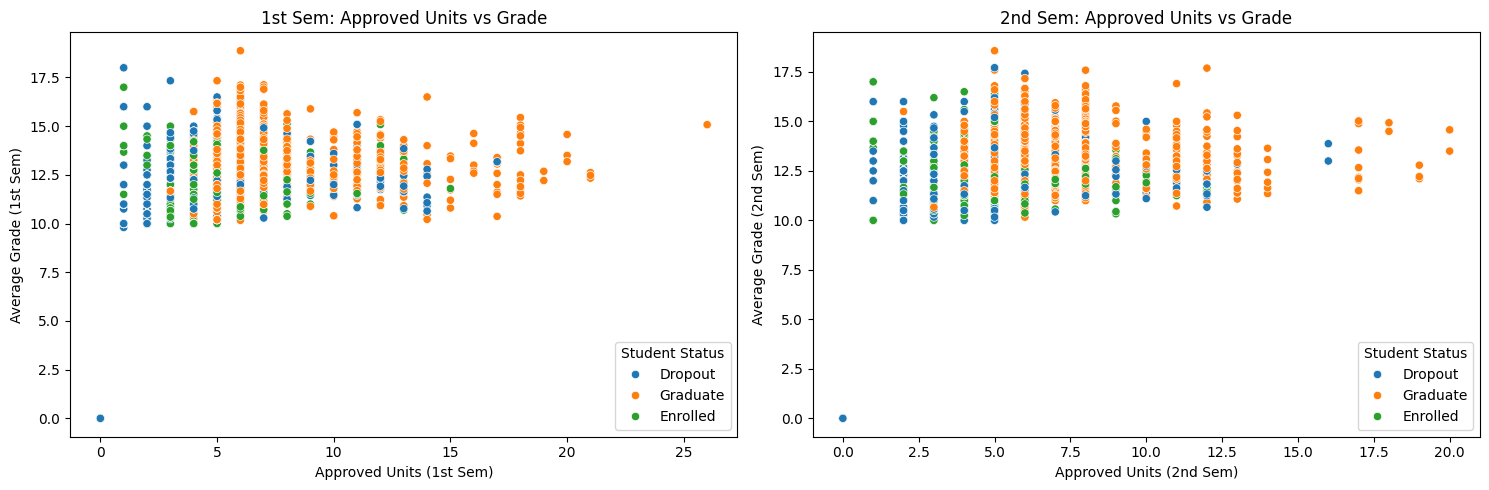

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Approved Units (1st Sem)', y='Average Grade (1st Sem)', hue='Student Status')
plt.title('1st Sem: Approved Units vs Grade')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Approved Units (2nd Sem)', y='Average Grade (2nd Sem)', hue='Student Status')
plt.title('2nd Sem: Approved Units vs Grade')

plt.tight_layout()
plt.show()